In [3]:
from Define_Model.demucs_feature import Demucs
import numpy as np
import torch

import kaldi_io
import matplotlib.pyplot as plt
import matplotlib
import torch

%matplotlib inline
plt.rc('font', family='Times New Roman')

In [4]:
model = Demucs(resnet_size=3, input_dim=40)

ckp = torch.load('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/checkpoint/Demucs3/vox1/klfb_egs_enhance/mse/wde4_var/checkpoint_20.pth')
model.load_state_dict(ckp['state_dict'])


<All keys matched successfully>

In [11]:
i10 = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox1/klfb/fbank/dev_fb40/raw_fbank_dev_fb40.1.ark:26')
i10_ba = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox1/klfb/fbank/dev_aug_fb40/raw_fbank_dev_aug_fb40.1.ark:33')
i10_mu = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox1/klfb/fbank/dev_aug_fb40/raw_fbank_dev_aug_fb40.1.ark:33624')
i10_no = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox1/klfb/fbank/dev_aug_fb40/raw_fbank_dev_aug_fb40.1.ark:67215')
i10_re = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox1/klfb/fbank/dev_aug_fb40/raw_fbank_dev_aug_fb40.1.ark:100807')

i10s = [i10, i10_ba, i10_mu, i10_no, i10_re]

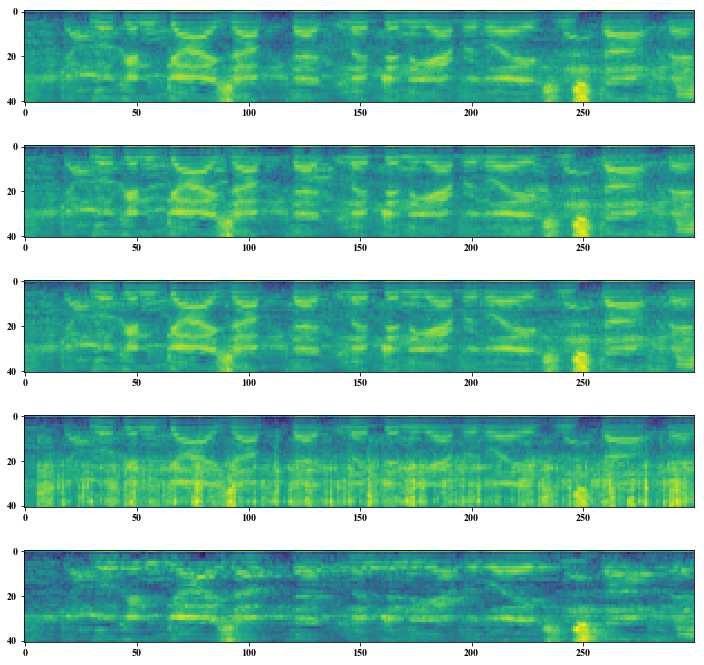

In [13]:

plt.figure(figsize=(12, 12))
for i in range(len(i10s)):
    ax = plt.subplot(len(i10s), 1, i+1)
    im = plt.imshow(i10s[i].transpose()[:,:300])


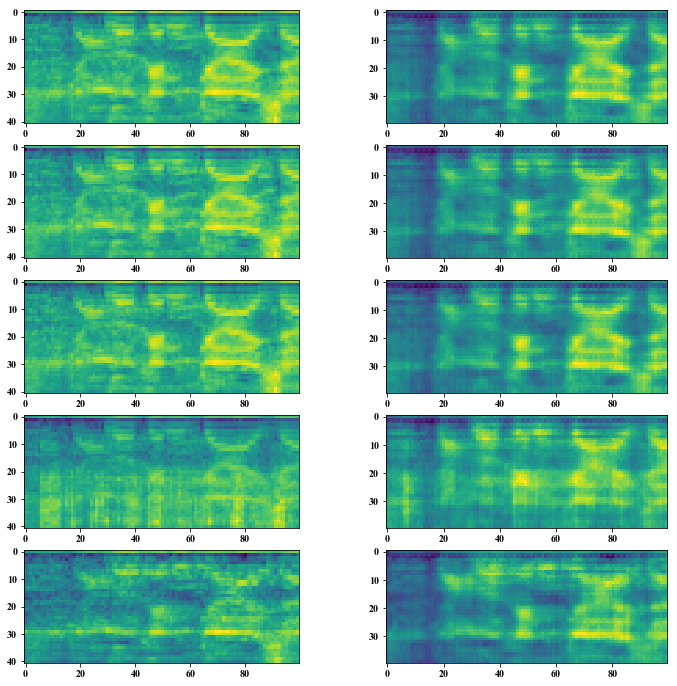

In [24]:
model.eval()
plt.figure(figsize=(12, 12))
for i in range(len(i10s)):
    ax = plt.subplot(len(i10s), 2, 2*i+1)
    im = plt.imshow(i10s[i].transpose()[:,:100])
    
    ax = plt.subplot(len(i10s), 2, 2*i+2)
    x1 = i10s[i]
    x = torch.tensor(x1[:,:40]).unsqueeze(0)
    x_en = model(x)
    
    im = plt.imshow(x_en.squeeze().detach().numpy().transpose()[:,:100])
    